In [ ]:
import os
from PIL import Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
dff = pd.read_csv('/content/drive/MyDrive/mnist.csv')

In [ ]:
dff

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,J
372447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,J
372448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,J
372449,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,J


In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372451 entries, 0 to 372450
Columns: 401 entries, 0 to label
dtypes: int64(400), object(1)
memory usage: 1.1+ GB


In [ ]:
dff.shape

(372451, 401)

In [ ]:
dff.label.value_counts()

O    57825
S    48419
U    29008
C    23409
T    22495
P    19341
N    19010
A    13870
M    12336
L    11586
R    11566
E    11440
Y    10859
W    10784
D    10134
B     8668
J     8493
H     7218
X     6272
Z     6076
Q     5812
G     5762
K     5603
V     4182
F     1163
I     1120
Name: label, dtype: int64

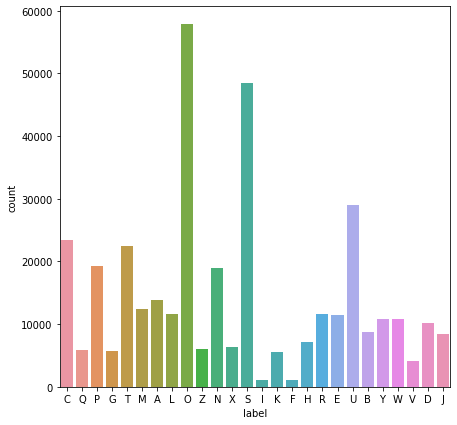

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,7))
sns.countplot(data=dff, x='label');

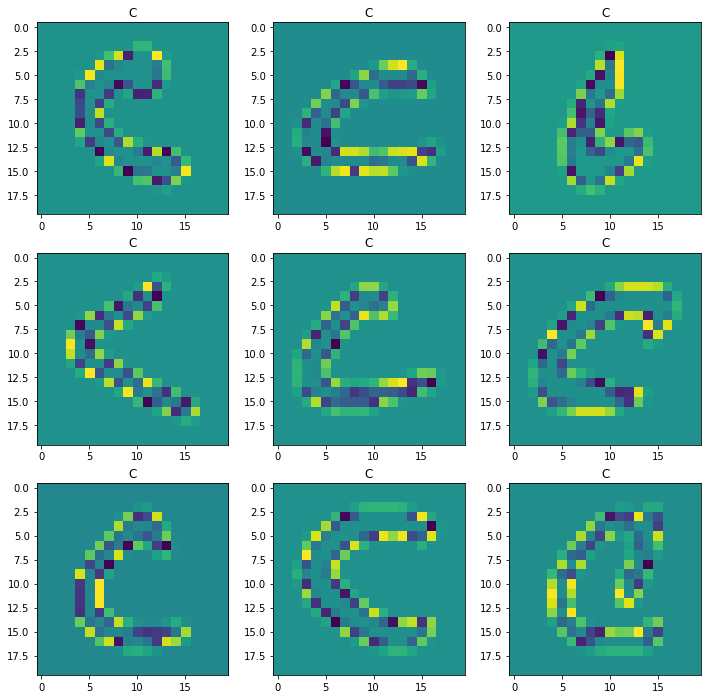

In [ ]:
plt.figure(figsize=(12, 12))
val = np.random.randint(0, 1796, 9)

for i in range(len(val)):
    plt.subplot(3, 3, i+1)
    plt.title(y[val[i]])
    img_grid = np.reshape(X.values[val[i]], (20,20))
    plt.imshow(img_grid)

## Spliting the input and output column

In [ ]:
X = dff.drop(['label'], axis=1)

y = dff['label']

## Spliting the train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Training & Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Prediction

In [ ]:
y_test_pred = classifier.predict(X_test)

In [ ]:
from sklearn import metrics
print('accuracy score: ', metrics.accuracy_score(y_test, y_test_pred))

LogisticRegression_score = metrics.accuracy_score(y_test, y_test_pred)

accuracy score:  0.5504924124450936


## Decision Tree 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_test_pred = classifier.predict(X_test)

print('accuracy score: ', metrics.accuracy_score(y_test, y_test_pred))

DecisionTreeClassifier_score = metrics.accuracy_score(y_test, y_test_pred)

accuracy score:  0.9281518155359617


## Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

y_test_predicted = classifier.predict(X_test)

print('accuracy score: ', metrics.accuracy_score(y_test, y_test_predicted))

RandomForestClassifier_score = metrics.accuracy_score(y_test, y_test_predicted)

accuracy score:  0.9784992428554552


## Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier()
classifier.fit(X_train, y_train)

y_test_predicted = classifier.predict(X_test)

print('accuracy score: ', metrics.accuracy_score(y_test, y_test_predicted))

AdaBoostClassifier_score = metrics.accuracy_score(y_test, y_test_predicted)

accuracy score:  0.5171995317517425


## Bagging 

In [ ]:
from sklearn.ensemble import BaggingClassifier
classifier = BaggingClassifier()
classifier.fit(X_train, y_train)

y_test_predicted = classifier.predict(X_test)

print('accuracy score: ', metrics.accuracy_score(y_test, y_test_predicted))

Bagging_score = metrics.accuracy_score(y_test, y_test_predicted)

accuracy score:  0.9537658543919754


In [ ]:
Results = pd.DataFrame({"Algorithm": ["LogisticRegression", "DecisionTreeClassifier", "RandomForestClassifier",
                                     "AdaBoostClassifier","BaggingClassifier"],
                    "Accuracy_Score": [LogisticRegression_score, DecisionTreeClassifier_score, RandomForestClassifier_score,
                                       AdaBoostClassifier_score, Bagging_score],
                     "Percentage": [LogisticRegression_score*100, DecisionTreeClassifier_score*100, RandomForestClassifier_score*100,
                                    AdaBoostClassifier_score*100, Bagging_score*100]})

In [ ]:
Results.Percentage = np.round(Results.Percentage,2).astype(str) + '%'
Results.sort_values(by="Accuracy_Score", ascending=False,ignore_index=True)

,Algorithm,Accuracy_Score,Percentage
0,RandomForestClassifier,0.978499,97.85%
1,BaggingClassifier,0.953766,95.38%
2,DecisionTreeClassifier,0.928152,92.82%
3,LogisticRegression,0.550492,55.05%
4,AdaBoostClassifier,0.517200,51.72%


## Conclusion:
- from the above observations we have observed that Random Forest is having 97.8% 
- Ada Boost is having least percentage having 51.72%